In [1]:
#
from pandas_datareader import data as pdr
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
yf.pdr_override()


In [2]:
##############################################################################
############### FUNCTIONS FOR QUICK DATA IMPORTING AND CLEANING ##############                            
##############################################################################


#A function to import data from yahoo finance-
def y_importer(y):
    start_date = '2018-05-24'
    end_date = '2021-05-24'
    x = pdr.get_data_yahoo(y, start=start_date, end=end_date)
    return x

# a function with a for loop to fill missing values with forward fill 
#ie. the previous value
def fill_missing_val(x):
        for col in x:
            x[col].fillna(method='ffill',inplace = True)
        return   x.isnull().any()


#creating a new function to clean data
def crypto_cleaner(x):
    x['Change %']= x['Close'].pct_change()
    x['Change %'].fillna(method = 'bfill',inplace = True)
    x.reset_index(inplace=True,drop=False)
    x.Date = x.Date.astype('datetime64')
    return x.info()
    
#creating a new function to plot data
def crypto_plotter(x):
    fig, (ax1,ax2,ax3) = plt.subplots(3,1)

    ax1.plot(x['Date'],x['Close'])
    ax2.plot(x['Date'],x['Change %'],color = 'g')
    ax3.plot(x['Date'],x['Volume'],color = 'r')


    fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

    plt.tight_layout()
    %config InlineBackend.figure_format = 'svg'
    plt.show()

#creating a function to drop unnecessary data
def crypto_dropper(x):
    x['close']=x['Close']
    x['pct_chng']=x['Change %']
    x['vol']=x['Volume']

    x.drop(x.iloc[:,1:8], axis = 1, inplace=True)

    return x

#creating a function to combine previous 3 functions
def crypto_processor(x):
    fill_missing_val(x)
    crypto_cleaner(x)
    crypto_plotter(x)
    crypto_dropper(x)
    return x


[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1093 non-null   datetime64[ns]
 1   Open       1093 non-null   float64       
 2   High       1093 non-null   float64       
 3   Low        1093 non-null   float64       
 4   Close      1093 non-null   float64       
 5   Adj Close  1093 non-null   float64       
 6   Volume     1093 non-null   int64         
 7   Change %   1093 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 68.4 KB


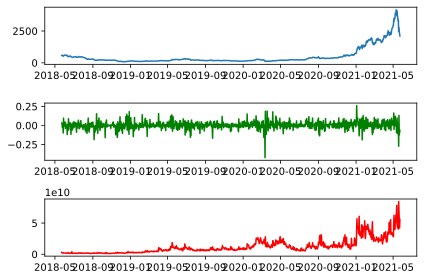

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1093 non-null   datetime64[ns]
 1   Open       1093 non-null   float64       
 2   High       1093 non-null   float64       
 3   Low        1093 non-null   float64       
 4   Close      1093 non-null   float64       
 5   Adj Close  1093 non-null   float64       
 6   Volume     1093 non-null   int64         
 7   Change %   1093 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 68.4 KB


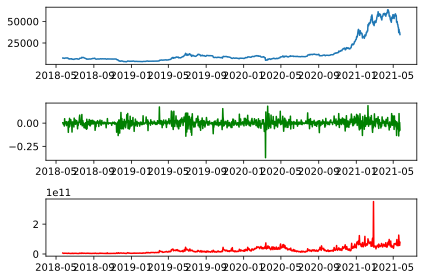

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1093 non-null   datetime64[ns]
 1   Open       1093 non-null   float64       
 2   High       1093 non-null   float64       
 3   Low        1093 non-null   float64       
 4   Close      1093 non-null   float64       
 5   Adj Close  1093 non-null   float64       
 6   Volume     1093 non-null   int64         
 7   Change %   1093 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 68.4 KB


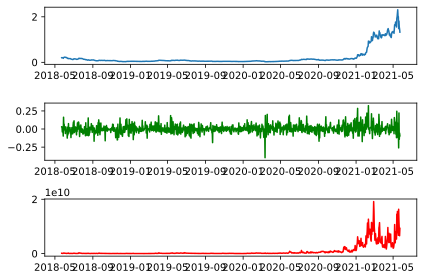

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1093 non-null   datetime64[ns]
 1   Open       1093 non-null   float64       
 2   High       1093 non-null   float64       
 3   Low        1093 non-null   float64       
 4   Close      1093 non-null   float64       
 5   Adj Close  1093 non-null   float64       
 6   Volume     1093 non-null   int64         
 7   Change %   1093 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 68.4 KB


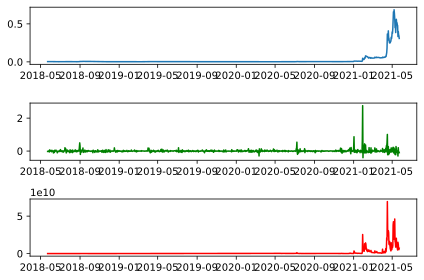

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1093 non-null   datetime64[ns]
 1   Open       1093 non-null   float64       
 2   High       1093 non-null   float64       
 3   Low        1093 non-null   float64       
 4   Close      1093 non-null   float64       
 5   Adj Close  1093 non-null   float64       
 6   Volume     1093 non-null   int64         
 7   Change %   1093 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 68.4 KB


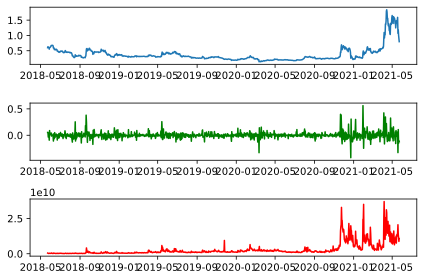

,Date,close,pct_chng,vol
0,2018-05-23,0.599594,0.054042,482480992
1,2018-05-24,0.631997,0.054042,440532992
2,2018-05-25,0.611001,-0.033222,289816000
3,2018-05-26,0.612708,0.002794,213242000
4,2018-05-27,0.607881,-0.007878,186963008
...,...,...,...,...
1088,2021-05-19,1.070313,-0.327158,20523476458
1089,2021-05-20,1.185537,0.107654,13626658452
1090,2021-05-21,1.006976,-0.150616,10998911191
1091,2021-05-22,0.906317,-0.099962,8750076614


In [6]:
#Importing and cleaning all required crypto currencies 
#WITH JUST 10 LINES OF CODE 

eth = y_importer('ETH-USD')
crypto_processor(eth)

btc = y_importer('BTC-USD')
crypto_processor(btc)

ada = y_importer('ADA-USD')
crypto_processor(ada)

doge = y_importer('DOGE-USD')
crypto_processor(doge)

xrp = y_importer('XRP-USD')
crypto_processor(xrp)
